# Tutorial 1: Basics of CrypTen Tensors

We now have a high-level understanding of how secure MPC works. Through these tutorials, we will explain how to use CrypTen to carry out secure operations on encrypted tensors. In this tutorial, we will introduce a fundamental building block in CrypTen, called a ```CrypTensor```.  ```CrypTensors``` are encrypted ```torch``` tensors that can be used for computing securely on data. 

CrypTen currently only supports secure MPC protocols (though we intend to add support for other advanced encryption protocols). Using the ```mpc``` backend, ```CrypTensors``` act as ```torch``` tensors whose values are encrypted using secure MPC protocols. Tensors created using the ```mpc``` backend are called ```MPCTensors```. We will go into greater detail about ```MPCTensors``` in Tutorial 2. 

Let's begin by importing ```crypten``` and ```torch``` libraries. (If the imports fail, please see the installation instructions in the README.)

In [1]:
import crypten
import torch
from crypten.config import cfg
import timeit
import crypten.communicator as comm
from crypten.config import cfg
import logging
import matplotlib.pyplot as plt

crypten.init()
logging.getLogger().setLevel(logging.INFO)

# comm.get().set_verbosity(True)
# ... do stuff ..
# comm.get().print_communication_stats()

/Users/memo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def print_diff(x, z_enc):
    diff = (x - z_enc.get_plain_text()).abs()
    relative = ((x - z_enc.get_plain_text()) / (z_enc.get_plain_text()+2.2e-16)).abs()
    print(f"MAE: {diff.mean()}, MRE: {relative.mean():e}, MAX: {diff.max()}")
    # print(diff[:print_terms])
    plt.plot(diff)
num_iters = 1
print_terms = 1

def print_app(name, end_time, start_time):
    print(f"  {name}: {num_iters} iterations in {end_time - start_time} sec.") # : {z_enc.get_plain_text()[:print_terms]}")


torch.Size([18, 10])
Negative Exponential:
  Approx: 1 iterations in 0.002675708004971966 sec.
MAE: 0.0002597938000690192, MRE: 4.894455e+09, MAX: 0.0017482638359069824
  Nexp: 1 iterations in 0.007803207998222206 sec.
MAE: 0.0033238749019801617, MRE: 8.071964e+09, MAX: 0.05615884065628052
  Haar: 1 iterations in 0.009548292000545189 sec.
MAE: 0.33956554532051086, MRE: 8.054409e+10, MAX: 0.8681597709655762
  Bior: 1 iterations in 0.002751790998445358 sec.
MAE: 0.00013118698552716523, MRE: 8.054409e+10, MAX: 0.0036556124687194824


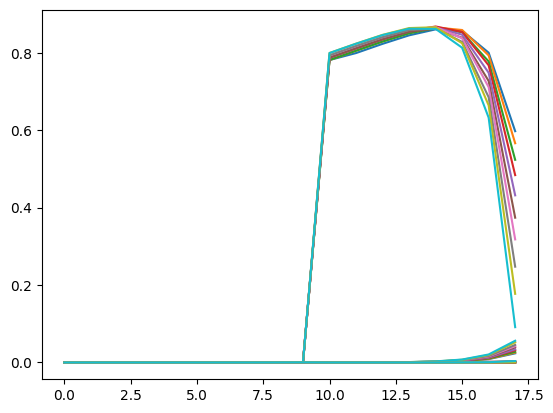

In [3]:
#Construct example input CrypTensor
x = torch.arange(-18, 0, 0.1)
x = x.reshape([18, 10])
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Negative Exponential:")
# print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print_app("Approx", timeit.default_timer(), start1)
    # print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'split', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    # print("  Nexp   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Nexp", timeit.default_timer(), start1)
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    # print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Haar", timeit.default_timer(), start1)
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    # print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Bior", timeit.default_timer(), start1)
    print_diff(x.exp(), z_enc)

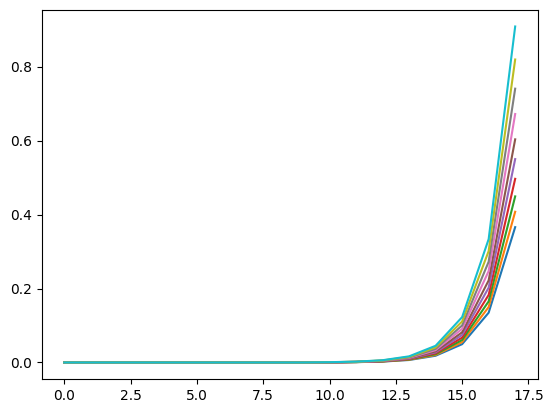

In [4]:
plt.plot(z_enc.get_plain_text())

torch.Size([54])
Exponential:
  Exact : tensor([0.0003])
  Approx: 1 iterations in 0.002616834004584234 sec.: tensor([0.0003])
MAE: 18.326339721679688, MRE: 4.838004e-02, MAX: 310.091552734375


  Haar  : 1 iterations in 0.005038542003603652 sec.: tensor([0.0003])
MAE: 175.4473876953125, MRE: 1.941551e+02, MAX: 2032.023193359375
  Bior  : 1 iterations in 0.0013551250012824312 sec.: tensor([0.0005])
MAE: 192.5103302001953, MRE: 1.929681e+05, MAX: 2697.281982421875


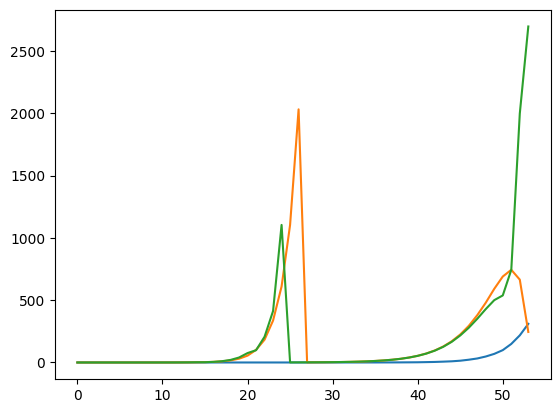

In [5]:
#Construct example input CrypTensor
x = torch.arange(-8, 8, 0.3)
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Exponential:")
print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)


Reciprocal:
  Approx: 1 iterations in 0.021838250002474524 sec.
MAE: 0.0002532003854867071, MRE: 1.045818e-02, MAX: 0.0009536799043416977
  Log: 1 iterations in 0.05901695899956394 sec.
MAE: 8.095251541817561e-05, MRE: 4.682195e-04, MAX: 0.007499992847442627
  Haar: 1 iterations in 0.4367787090013735 sec.
MAE: 6.571487756446004e-05, MRE: 4.286843e-04, MAX: 0.00775146484375
  Bior: 1 iterations in 0.026451916004589293 sec.
MAE: 3.882775126839988e-05, MRE: 3.029460e-04, MAX: 0.011260986328125


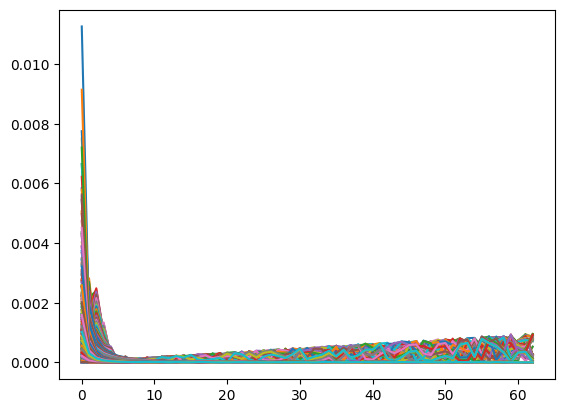

In [6]:
# x = torch.tensor([0.00005, 0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]) # , 5, 10, 50, 100 , 500, 1000, 5000, 10000, 50000])
x = torch.arange(1.0, 64, 0.01)
x = x.reshape((63, 100))
x_enc = crypten.cryptensor(x)

print("\nReciprocal:")
# print("  Exact :", x.reciprocal()[:print_terms])
with cfg.temp_override({"functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    # print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Approx", timeit.default_timer(), start1)
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'log', "functions.log_method": 'iter'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    # print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Log", timeit.default_timer(), start1)
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    # print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Haar", timeit.default_timer(), start1)
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    # print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_app("Bior", timeit.default_timer(), start1)
    print_diff(x.reciprocal(), z_enc)


Logarithm (LUT faster):
  Exact : tensor([-4.6052])
  Approx: 1 iterations in 0.019082916995103005 sec.: tensor([-9.5972])
MAE: 0.3913863003253937, MRE: 7.936329e-02, MAX: 6.106107234954834
  Haar  : 1 iterations in 0.01582037499611033 sec.: tensor([-5.1546])
MAE: 0.0037755246739834547, MRE: 7.334734e-03, MAX: 0.5494165420532227
  Bior  : 1 iterations in 0.005349540995666757 sec.: tensor([-7.4477])
MAE: 0.014203403145074844, MRE: 4.897830e-03, MAX: 2.84255313873291


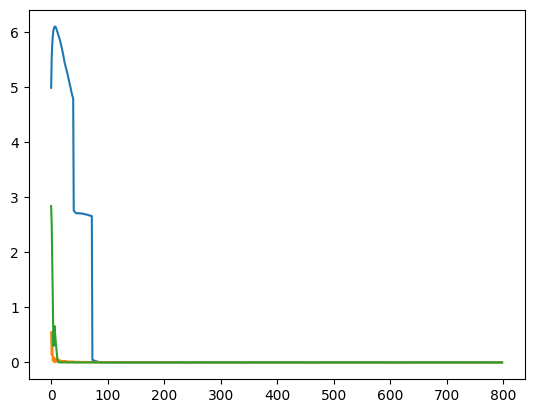

In [7]:
x = torch.arange(0.01, 8, 0.01)
x_enc = crypten.cryptensor(x)

print("\nLogarithm (LUT faster):")
print("  Exact :", x.log()[:print_terms])
with cfg.temp_override({"functions.log_method": 'iter'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)

torch.Size([790])

Square Root: (LUT faster)
  Exact : tensor([0.3162])
  Approx: 1 iterations in 0.008653874996525701 sec.: tensor([0.3146])
MAE: 0.0015121137257665396, MRE: 6.704341e-04, MAX: 0.007613420486450195
  Haar   : 1 iterations in 0.015412375003506895 sec.: tensor([0.3186])
MAE: 0.0012463157763704658, MRE: 1.094088e-03, MAX: 0.010607421398162842
  Bior   : 1 iterations in 0.002536207997763995 sec.: tensor([0.2478])
MAE: 0.0011662871111184359, MRE: 2.824123e-03, MAX: 0.06840977072715759


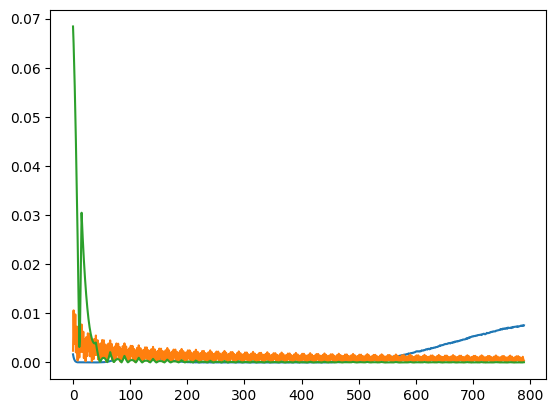

In [8]:
x = torch.arange(0.1, 8, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSquare Root: (LUT faster)")
print("  Exact :", x.sqrt()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)

torch.Size([6390])

Inverse Square Root: (LUT faster)
  Exact : tensor([3.1623])
  Approx: 1 iterations in 0.016735375000280328 sec.: tensor([3.1461])
MAE: 0.00011838471255032346, MRE: 3.617501e-04, MAX: 0.016190052032470703
  Haar   : 1 iterations in 0.10365137499320554 sec.: tensor([3.1401])
MAE: 0.2538091242313385, MRE: 4.259421e-01, MAX: 15.494486808776855
  Bior   : 1 iterations in 0.10542975000134902 sec.: tensor([3.1634])
MAE: 0.3214499056339264, MRE: 4.258255e-01, MAX: 135.8702850341797


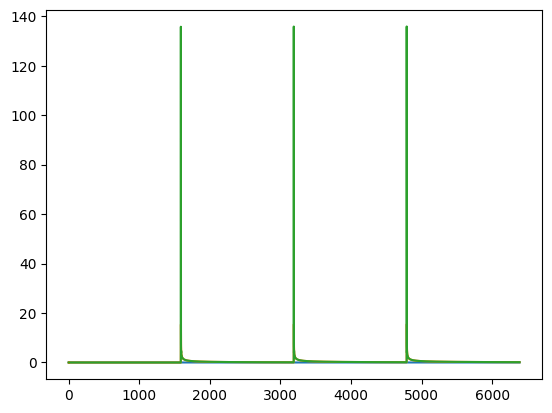

In [9]:
x = torch.arange(0.1, 64, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nInverse Square Root: (LUT faster)")
print("  Exact :", x.sqrt().reciprocal()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)

torch.Size([2, 2])

Sin:
  Exact : tensor([[0.1782, 0.8075]])
  Approx: 1 iterations in 0.0098423749950598 sec.: tensor([[0.1707, 0.8084]])
MAE: 0.0045847781002521515, MRE: 1.565535e-02, MAX: 0.007416591048240662
  Haar  : 1 iterations in 0.0031212500034598634 sec.: tensor([[0.1710, 0.8152]])
MAE: 0.0075030215084552765, MRE: 1.873744e-02, MAX: 0.00849151611328125
  Bior  : 1 iterations in 0.0028732089995173737 sec.: tensor([[0.1782, 0.8072]])
MAE: 0.0007748715579509735, MRE: 1.245223e-03, MAX: 0.00160980224609375


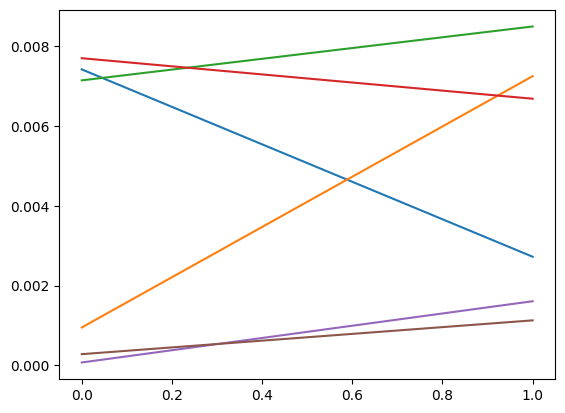

In [10]:
# x = torch.arange(-10, 10, 0.01)
x = torch.rand((2, 2))
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSin:")
print("  Exact :", x.sin()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)


Cos:
  Exact : tensor([[0.9840, 0.5899]])
  Approx: 1 iterations in 0.00988770800177008 sec.: tensor([[0.9861, 0.5952]])
MAE: 0.004363328218460083, MRE: 6.276417e-03, MAX: 0.00587916374206543
  Haar  : 1 iterations in 0.0028628750005736947 sec.: tensor([[0.9852, 0.5791]])
MAE: 0.0071059465408325195, MRE: 1.176699e-02, MAX: 0.012671291828155518
  Bior  : 1 iterations in 0.002451250002195593 sec.: tensor([[0.9821, 0.5893]])
MAE: 0.001384437084197998, MRE: 1.731901e-03, MAX: 0.0022628307342529297


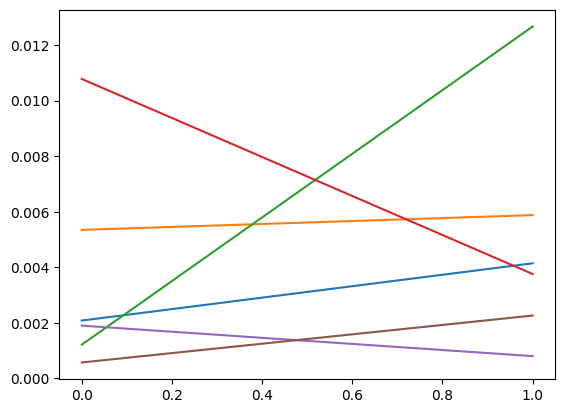

In [11]:
print("\nCos:")
print("  Exact :", x.cos()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)


Sigmoid:
  Exact : tensor([[0.5447, 0.7191]])
  Approx: 1 iterations in 0.009583708000718616 sec.: tensor([[0.5439, 0.7196]])
MAE: 0.0007083415985107422, MRE: 1.100182e-03, MAX: 0.0009905695915222168
  Haar  : 1 iterations in 0.007062167002004571 sec.: tensor([[0.5448, 0.7202]])
MAE: 0.0006844401359558105, MRE: 9.628955e-04, MAX: 0.0014788508415222168
  Bior  : 1 iterations in 0.004747166996821761 sec.: tensor([[0.5447, 0.7190]])
MAE: 8.448958396911621e-05, MRE: 1.239642e-04, MAX: 0.0001665949821472168


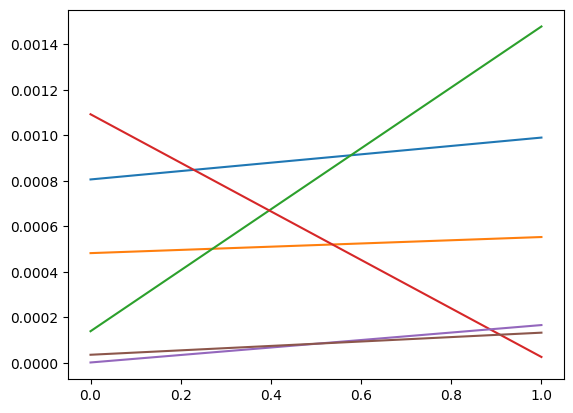

In [12]:
print("\nSigmoid:")
print("  Exact :", x.sigmoid()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)

Tanh:
  Exact : tensor([[0.1772, 0.7352]])
  Approx: 1 iterations in 0.010194915994361509 sec.: tensor([[0.1765, 0.7370]])
MAE: 0.001250535249710083, MRE: 2.554486e-03, MAX: 0.0021965503692626953
  Haar  : 1 iterations in 0.007206666996353306 sec.: tensor([[0.1778, 0.7376]])
MAE: 0.001591116189956665, MRE: 2.745874e-03, MAX: 0.0032341480255126953
  Bior  : 1 iterations in 0.00399279200064484 sec.: tensor([[0.1773, 0.7346]])
MAE: 0.0008204877376556396, MRE: 1.448274e-03, MAX: 0.0016924142837524414


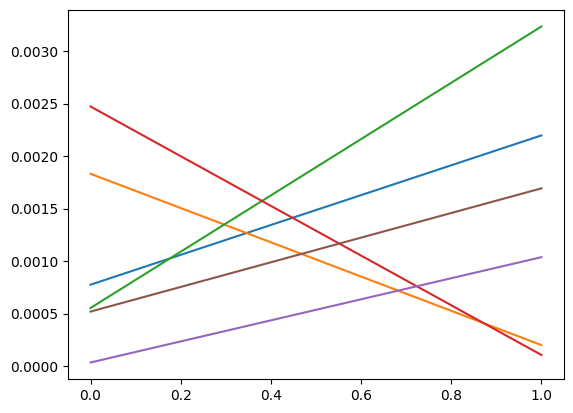

In [13]:
print("Tanh:")
print("  Exact :", x.tanh()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)

torch.Size([200])
Erf:
  Exact : tensor([-0.8427])
  Approx: 1 iterations in 0.012613042003067676 sec.: tensor([-0.6081])
MAE: 0.019181039184331894, MRE: 2.970911e-02, MAX: 0.23463791608810425
  Haar  : 1 iterations in 0.01031620799767552 sec.: tensor([-0.8459])
MAE: 0.0032958551310002804, MRE: 2.335310e-02, MAX: 0.008819580078125
  Bior  : 1 iterations in 0.0041445000024395995 sec.: tensor([-0.8591])
MAE: 0.006429800298064947, MRE: 2.316806e-02, MAX: 0.016430199146270752


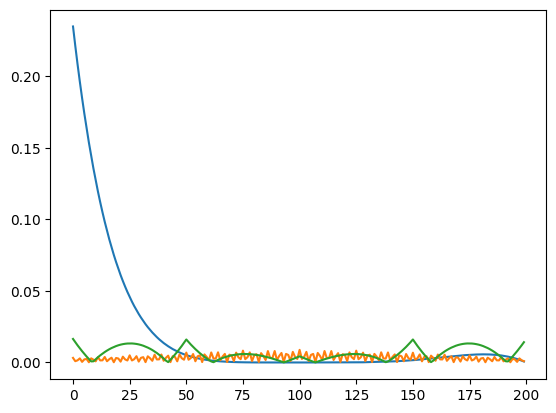

In [14]:
x = torch.arange(-1, 1, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("Erf:")
print("  Exact :", x.erf()[:print_terms])
with cfg.temp_override({"functions.erf_method": 'Taylor'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)
with cfg.temp_override({"functions.erf_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)
with cfg.temp_override({"functions.erf_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)


Gelu:
  Approx: 1 iterations in 0.020117625004786532 sec.
MAE: 9673.6591796875, MRE: 6.228086e-01, MAX: 190557.90625
  Erf: 1 iterations in 0.005635250003251713 sec.
MAE: 0.0021802112460136414, MRE: 2.327553e-01, MAX: 0.009909994900226593
  Haar: 1 iterations in 0.005447249997814652 sec.
MAE: 0.01320279948413372, MRE: 3.540708e-02, MAX: 0.9998732805252075
  Bior: 1 iterations in 0.005318041999998968 sec.
MAE: 0.012912158854305744, MRE: 3.217306e-02, MAX: 0.9998732805252075


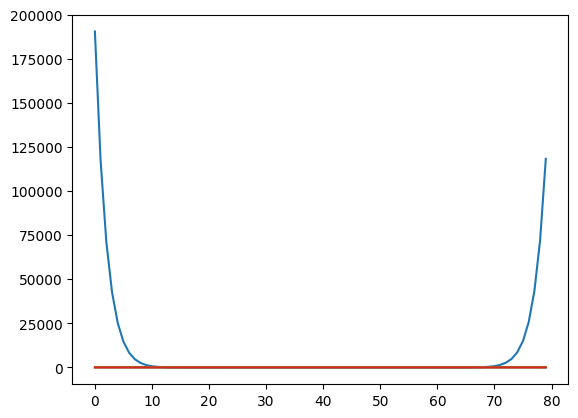

In [28]:
x = torch.arange(-4, 4, 0.1)
x_enc = crypten.cryptensor(x)

gelu = x * (1 + (x / torch.sqrt(torch.tensor(2))).erf()) / 2
relu = x * (x > 0)

print("\nGelu:")
# print("  Exact :", gelu)
with cfg.temp_override({"functions.gelu_method": 'erf', "functions.erf_method": 'Taylor'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.gelu()  # Private
    print_app("Approx", timeit.default_timer(), start1)
    print_diff(gelu, z_enc)
with cfg.temp_override({"functions.gelu_method": 'erf', "functions.erf_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.gelu()  # Private
    print_app("Erf", timeit.default_timer(), start1)
    print_diff(gelu, z_enc)
with cfg.temp_override({"functions.gelu_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.gelu()  # Private
    print_app("Haar", timeit.default_timer(), start1)
    print_diff(gelu, z_enc)
with cfg.temp_override({"functions.gelu_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.gelu()  # Private
    print_app("Bior", timeit.default_timer(), start1)
    print_diff(gelu, z_enc)


Silu:
  Approx: 1 iterations in 0.018068457997287624 sec.
MAE: 0.03470128774642944, MRE: 2.115344e-01, MAX: 0.08834075927734375
  Sigmoid: 1 iterations in 0.0050313749961787835 sec.
MAE: 0.000142067699925974, MRE: 7.936675e-03, MAX: 0.0008265972137451172
  Haar: 1 iterations in 0.010686000001442153 sec.
MAE: 0.0002823147806338966, MRE: 8.365653e-03, MAX: 0.003875732421875
  Bior: 1 iterations in 0.004989332999684848 sec.
MAE: 0.00018473589443601668, MRE: 7.655250e-03, MAX: 0.0022849738597869873


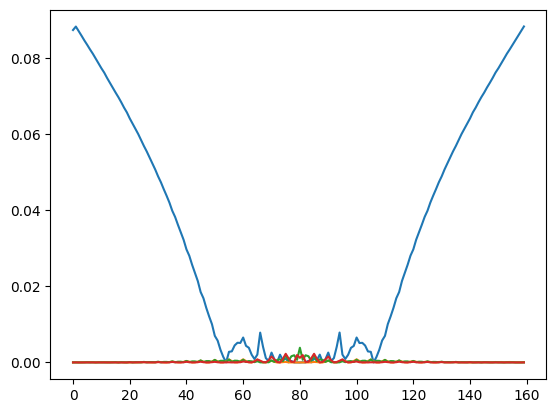

In [29]:
x = torch.arange(-8, 8, 0.1)
x_enc = crypten.cryptensor(x)

silu = x * x.sigmoid()
relu = x * (x > 0)

print("\nSilu:")
# print("  Exact :", silu)
with cfg.temp_override({"functions.silu_method": 'sigmoid', "functions.sigmoid_tanh_method": 'reciprocal'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.silu()  # Private
    print_app("Approx", timeit.default_timer(), start1)
    print_diff(silu, z_enc)
with cfg.temp_override({"functions.silu_method": 'sigmoid', "functions.sigmoid_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.silu()  # Private
    print_app("Sigmoid", timeit.default_timer(), start1)
    print_diff(silu, z_enc)
with cfg.temp_override({"functions.silu_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.silu()  # Private
    print_app("Haar", timeit.default_timer(), start1)
    print_diff(silu, z_enc)
with cfg.temp_override({"functions.silu_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.silu()  # Privat6
    print_app("Bior", timeit.default_timer(), start1)
    print_diff(silu, z_enc)

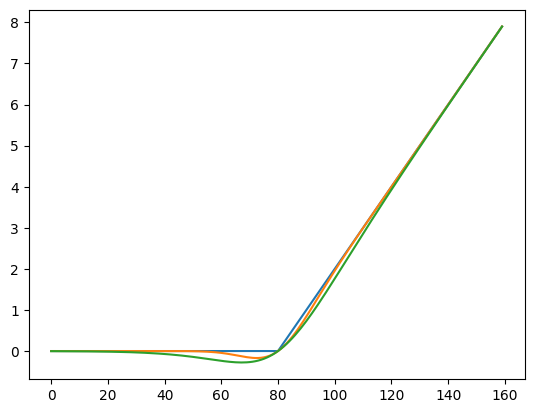

In [24]:
plt.plot(relu)
plt.plot(gelu)
plt.plot(silu)

#### Advanced mathematics
We are also able to compute more advanced mathematical functions on ```CrypTensors``` using iterative approximations. CrypTen provides MPC support for functions like reciprocal, exponential, logarithm, square root, tanh, etc. Notice that these are subject to numerical error due to the approximations used. 

Additionally, note that some of these functions will fail silently when input values are outside of the range of convergence for the approximations used. These do not produce errors because value are encrypted and cannot be checked without decryption. Exercise caution when using these functions. (It is good practice here to normalize input values for certain models.)